## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

We check the distribution of variables for the column we want to predict.

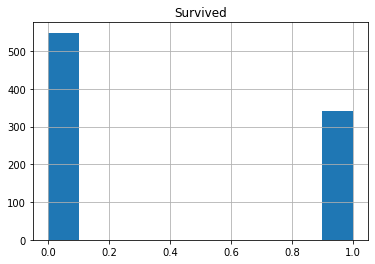

0    549
1    342
Name: Survived, dtype: int64

In [4]:
# Calculate value counts for the Survived column
data.hist('Survived')
plt.show()
data['Survived'].value_counts()


First, check for missing data and remove all columns containing missing data

In [5]:
# Calculate NA values per column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df = data.drop(['Age','Cabin','Embarked'],axis=1)
df.shape

(891, 9)

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [7]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in df.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values


In [8]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
df2 = df.drop(columns=['PassengerId','Name','Ticket'])
df2.shape



(891, 6)

To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [9]:
df2.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208
std,0.486592,0.836071,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


In [10]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
df3 = pd.get_dummies(data=df2, columns=['Sex'], drop_first=True)

In [11]:
# Let's check the new columns
print(df3.shape)
df3.head()



(891, 6)


,Survived,Pclass,SibSp,Parch,Fare,Sex_male
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [12]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split

X = df3.drop('Survived', axis=1)
y = df3['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:
neighbors = KNeighborsClassifier(1)

neighbors.fit(X_train,y_train)

print(f"KNN Train Score: {neighbors.score(X_train, y_train):.3f}")
print(f"KNN Test Score: {neighbors.score(X_test, y_test):.3f}")

KNN Train Score: 0.900
KNN Test Score: 0.749


Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [14]:
# answer below:



The model is overfitting because we are fitting to one neighbor. 

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [15]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [16]:
# answer below:
for k_val in k_list:
  neighbors = KNeighborsClassifier(n_neighbors=k_val)
  neighbors.fit(X_train, y_train)
  accuracy_train.append(neighbors.score(X_train,y_train))
  accuracy_test.append(neighbors.score(X_test,y_test))
  f1_train.append(f1_score(y_train, neighbors.predict(X_train)))
  f1_test.append(f1_score(y_test,neighbors.predict(X_test)))


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

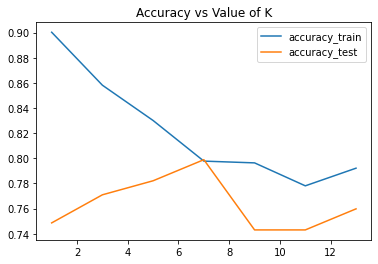

In [21]:
# answer below:
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.title('Accuracy vs Value of K')
plt.legend(['accuracy_train', 'accuracy_test'])
plt.show()




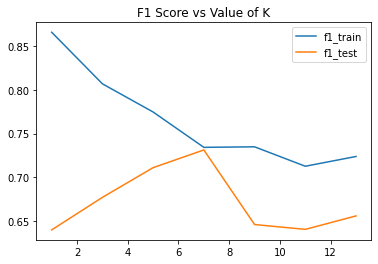

In [22]:
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.title('F1 Score vs Value of K')
plt.legend(['f1_train', 'f1_test'])
plt.show()

Please comment the results of the plots above

In [18]:
# Add your observations in comments below.



On both plots we see overfitting as value of K decreases from 7 to 1. Seven seems to be the sweet spot for difference between train and test accuracy being the lowest. We see a drop in test accuracy once we increase to more than 8 neighbors, but the train and test accuracy gap from 9-12 neighbors seems to stabalize. 